<a href="https://colab.research.google.com/github/aaronmj7/Stock-Market-Analysis/blob/main/Stock_Market_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Market Analysis - Forecast Analysis of Greggs Stocks using LSTM**

By Group No. 7

Aan Sarah Zachariah

Aaron Modiyil Joseph

Abel Abraham

Sam Philip Solo

Vishal Philip



In [ ]:
# Import necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import LSTM, SimpleRNN, Dropout, Dense
from keras.utils import set_random_seed, plot_model

In [ ]:
# Set random seed to get same result each time
set_random_seed(1)

# Set seaborn theme for better looking plots
sns.set_theme(context='paper', color_codes=True)

# Load Data

In [ ]:
# Fetch stock data from Yahoo Finance
ticker = 'GRG.L'
data = yf.download(ticker, start="2006-01-01",
                   end="2023-01-01") # taking 17 years of data

# Display the first few rows of the data
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,465.100006,469.195007,465.100006,469.000000,265.965424,72410
2006-01-04,470.000000,471.000000,465.200012,471.000000,267.099640,478870
2006-01-05,469.899994,471.000000,463.100006,470.000000,266.532440,266720
2006-01-06,471.000000,471.000000,462.200012,462.200012,262.109222,153240
2006-01-09,464.000000,469.899994,463.100006,465.100006,263.753815,111420


# Data Preprocessing

In [ ]:
# Display more info
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4295 entries, 2006-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4295 non-null   float64
 1   High       4295 non-null   float64
 2   Low        4295 non-null   float64
 3   Close      4295 non-null   float64
 4   Adj Close  4295 non-null   float64
 5   Volume     4295 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 234.9 KB


In [ ]:
# Analyse the data
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4295.000000,4295.000000,4295.000000,4295.000000,4295.000000,4.295000e+03
mean,1002.617134,1016.639311,987.802461,1002.167054,845.751481,3.405215e+05
std,719.229205,730.173076,707.138556,718.240160,715.723811,3.578404e+05
min,298.299988,307.700012,275.200012,300.700012,186.008636,0.000000e+00
25%,458.250000,464.000000,452.000000,458.649994,297.376709,1.552850e+05
50%,542.500000,548.500000,535.000000,544.000000,408.524353,2.497500e+05
75%,1301.000000,1318.309021,1281.643982,1300.500000,1132.222961,4.076525e+05
max,3365.000000,3443.000000,3345.000000,3416.000000,3197.597656,1.043786e+07


In [ ]:
# Extract the 'Close' prices from the DataFrame
close_df = data['Close']

# Display the first few rows of the data
close_df.head()

Date
2006-01-03    469.000000
2006-01-04    471.000000
2006-01-05    470.000000
2006-01-06    462.200012
2006-01-09    465.100006
Name: Close, dtype: float64

In [ ]:
# Display more info
close_df.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 4295 entries, 2006-01-03 to 2022-12-30
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
4295 non-null   float64
dtypes: float64(1)
memory usage: 67.1 KB


In [ ]:
# Analyse the close_df
close_df.describe()

count    4295.000000
mean     1002.167054
std       718.240160
min       300.700012
25%       458.649994
50%       544.000000
75%      1300.500000
max      3416.000000
Name: Close, dtype: float64

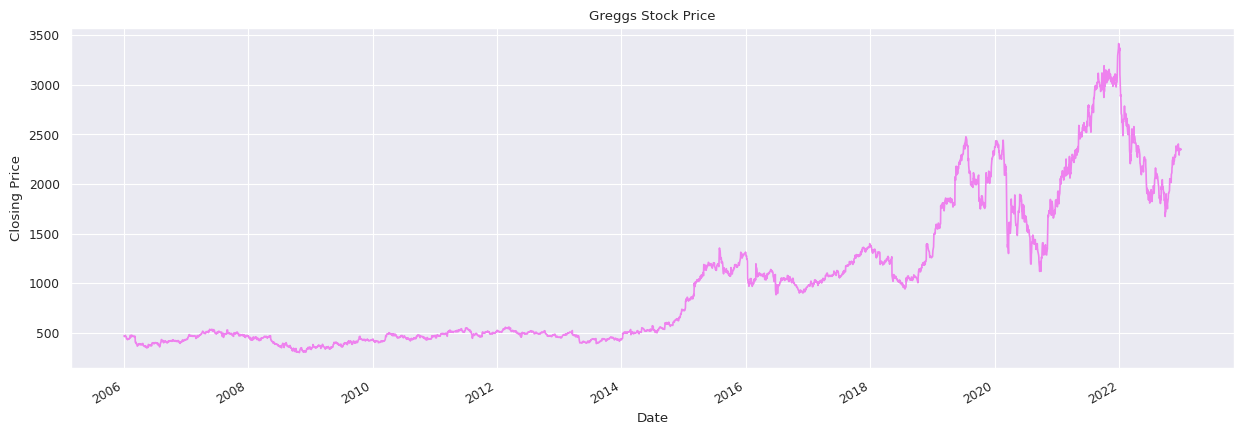

In [ ]:
# Plot the closing prices
close_df.plot(c='violet', figsize=(15,5))

plt.ylabel('Closing Price')
plt.title('Greggs Stock Price')

plt.show()

In [ ]:
# scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_df.values.reshape(-1,1))

In [ ]:
# Create the time series data structure
look_back = 60
train_size = int(len(scaled_data) * 0.80) # take 80 percent data as train data
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - look_back:]

train_generator = TimeseriesGenerator(train_data, train_data,
                                     length=look_back, batch_size=20)
test_generator = TimeseriesGenerator(test_data, test_data,
                                     length=look_back, batch_size=1)

# Define Model

In [ ]:
# Build the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, return_sequences=True,
                        input_shape=(look_back, 1), name='rnn_1'))
rnn_model.add(SimpleRNN(units=50, name='rnn_2'))
rnn_model.add(Dense(1, name='output_layer'))
rnn_model._name = 'RNN_Model'

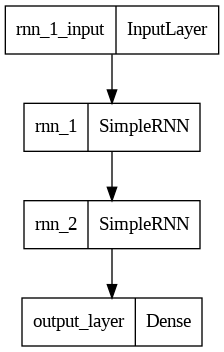

In [ ]:
# Plot the model
plot_model(rnn_model, to_file='rnn_model.png')

In [ ]:
# Get a summary of the model
rnn_model.summary()

Model: "RNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rnn_1 (SimpleRNN)           (None, 60, 50)            2600      
                                                                 
 rnn_2 (SimpleRNN)           (None, 50)                5050      
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 7701 (30.08 KB)
Trainable params: 7701 (30.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=100, return_sequences=True,
                    input_shape=(look_back, 1), name='lstm_1'))
lstm_model.add(Dropout(0.2, name='dropout_1'))
lstm_model.add(LSTM(units=50, name='lstm_2'))
lstm_model.add(Dropout(0.2, name='dropout_2'))
lstm_model.add(Dense(25, name='dense_1'))
lstm_model.add(Dense(1, name='output_layer'))
lstm_model._name = 'lstm_model'

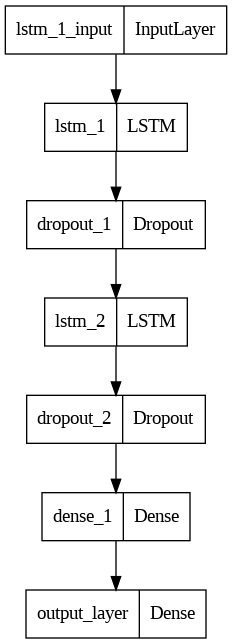

In [ ]:
# Plot the model
plot_model(lstm_model, to_file='lstm_model.png')

In [ ]:
# Get a summary of the model
lstm_model.summary()

Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 60, 100)           40800     
                                                                 
 dropout_1 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 output_layer (Dense)        (None, 1)                 26        
                                                                 
Total params: 72301 (282.43 KB)
Trainable params: 72301 

In [ ]:
# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Model Training

In [ ]:
# Fit the model with train data
rnn_model.fit(train_generator, batch_size=60, epochs=5)

Epoch 1/5
169/169 [==============================] - 20s 98ms/step - loss: 0.0087
Epoch 2/5
169/169 [==============================] - 18s 108ms/step - loss: 0.0010
Epoch 3/5
169/169 [==============================] - 17s 102ms/step - loss: 4.0291e-04
Epoch 4/5
169/169 [==============================] - 17s 101ms/step - loss: 3.1096e-04
Epoch 5/5
169/169 [==============================] - 17s 100ms/step - loss: 1.6314e-04


In [ ]:
# Fit the model
epoch = 30
history = lstm_model.fit(train_generator, validation_data=test_generator,
                         batch_size=30, epochs=epoch)

Epoch 1/30
169/169 [==============================] - 11s 32ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 2/30
169/169 [==============================] - 7s 43ms/step - loss: 7.0297e-04 - val_loss: 0.0013
Epoch 3/30
169/169 [==============================] - 5s 27ms/step - loss: 8.0565e-04 - val_loss: 0.0088
Epoch 4/30
169/169 [==============================] - 5s 32ms/step - loss: 7.0185e-04 - val_loss: 0.0012
Epoch 5/30
169/169 [==============================] - 4s 27ms/step - loss: 4.7232e-04 - val_loss: 0.0070
Epoch 6/30
169/169 [==============================] - 5s 30ms/step - loss: 4.5739e-04 - val_loss: 0.0016
Epoch 7/30
169/169 [==============================] - 7s 43ms/step - loss: 2.5860e-04 - val_loss: 0.0018
Epoch 8/30
169/169 [==============================] - 8s 49ms/step - loss: 6.2877e-04 - val_loss: 0.0013
Epoch 9/30
169/169 [==============================] - 5s 27ms/step - loss: 3.7204e-04 - val_loss: 0.0012
Epoch 10/30
169/169 [==============================] - 7s 

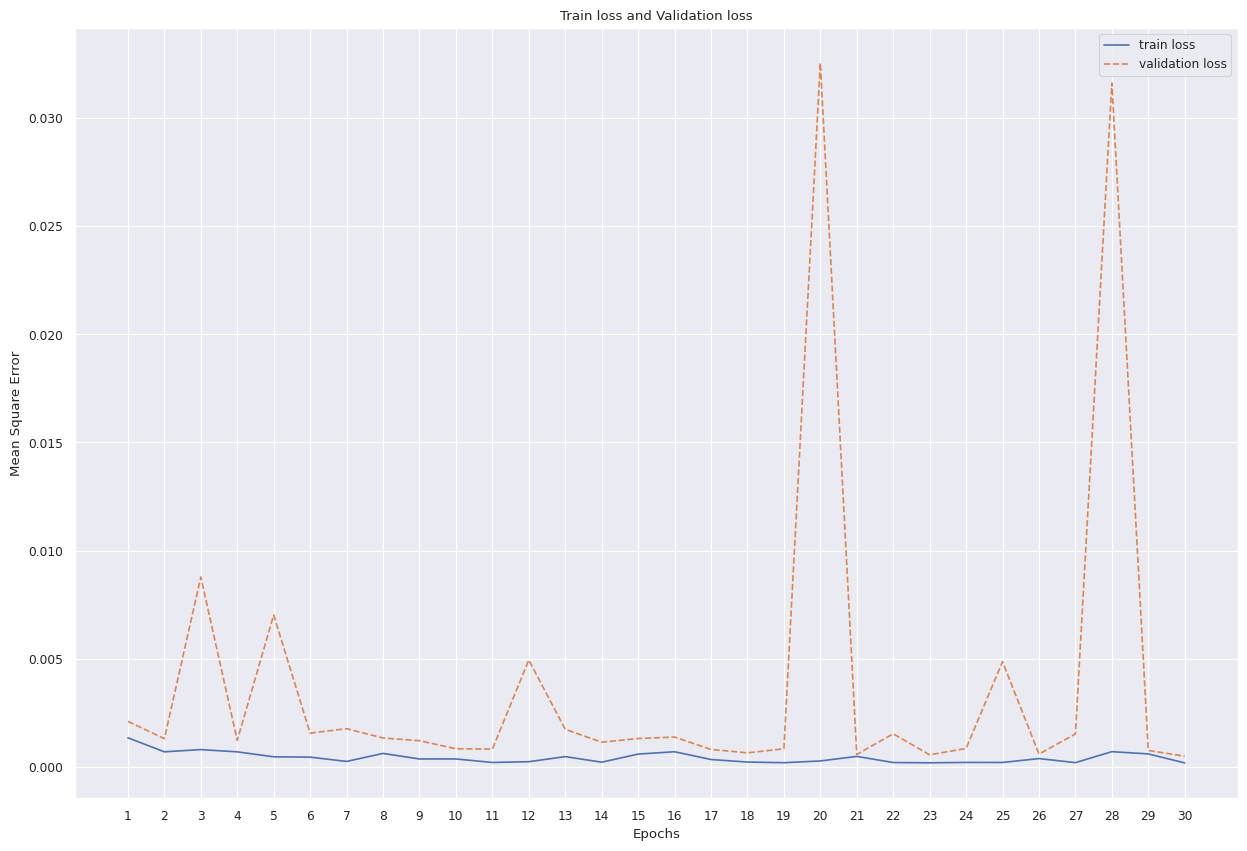

In [ ]:
# Plot train loss and validation loss
plt.figure(figsize=(15,10))

plt.plot(range(1, epoch + 1), history.history['loss'], label='train loss')
plt.plot(range(1, epoch + 1), history.history['val_loss'], ls='--',
         label='validation loss')

plt.xticks(range(1, epoch + 1))
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error')
plt.title('Train loss and Validation loss')
plt.legend()

plt.savefig('train_and_val_loss.png', dpi=300, bbox_inches="tight")
plt.show()

# Test Data Predictions

In [ ]:
# Predicting on the test data
rnn_predictions = rnn_model.predict(test_generator)
lstm_predictions = lstm_model.predict(test_generator)

# Invert predictions
rnn_predictions = scaler.inverse_transform(rnn_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
actual_prices = scaler.inverse_transform(test_data[look_back:])

859/859 [==============================] - 4s 5ms/step


In [ ]:
# Calculate root mean squared error (RMSE)
rnn_rmse = np.sqrt(np.mean((actual_prices - rnn_predictions) ** 2))
lstm_rmse = np.sqrt(np.mean((actual_prices - lstm_predictions) ** 2))
print('RNN: ', np.round(rnn_rmse, 4), '\nLSTM:', np.round(lstm_rmse, 4))

RNN:  123.6828 
LSTM: 69.707


In [ ]:
# Calculate mean absolute error (MAE)
rnn_mae = np.mean(np.abs(actual_prices - rnn_predictions))
lstm_mae = np.mean(np.abs(actual_prices - lstm_predictions))
print('RNN: ', np.round(rnn_mae, 4), '\nLSTM:', np.round(lstm_mae, 4))

RNN:  102.6455 
LSTM: 50.8815


In [ ]:
# Calculate mean absolute percentage error (MAPE)
rnn_mape = np.mean(np.abs((actual_prices - rnn_predictions) / actual_prices))
lstm_mape = np.mean(np.abs((actual_prices - lstm_predictions) / actual_prices))
print('RNN: ', np.round(rnn_mape, 4), '\nLSTM:', np.round(lstm_mape, 4))

RNN:  0.0514 
LSTM: 0.0251


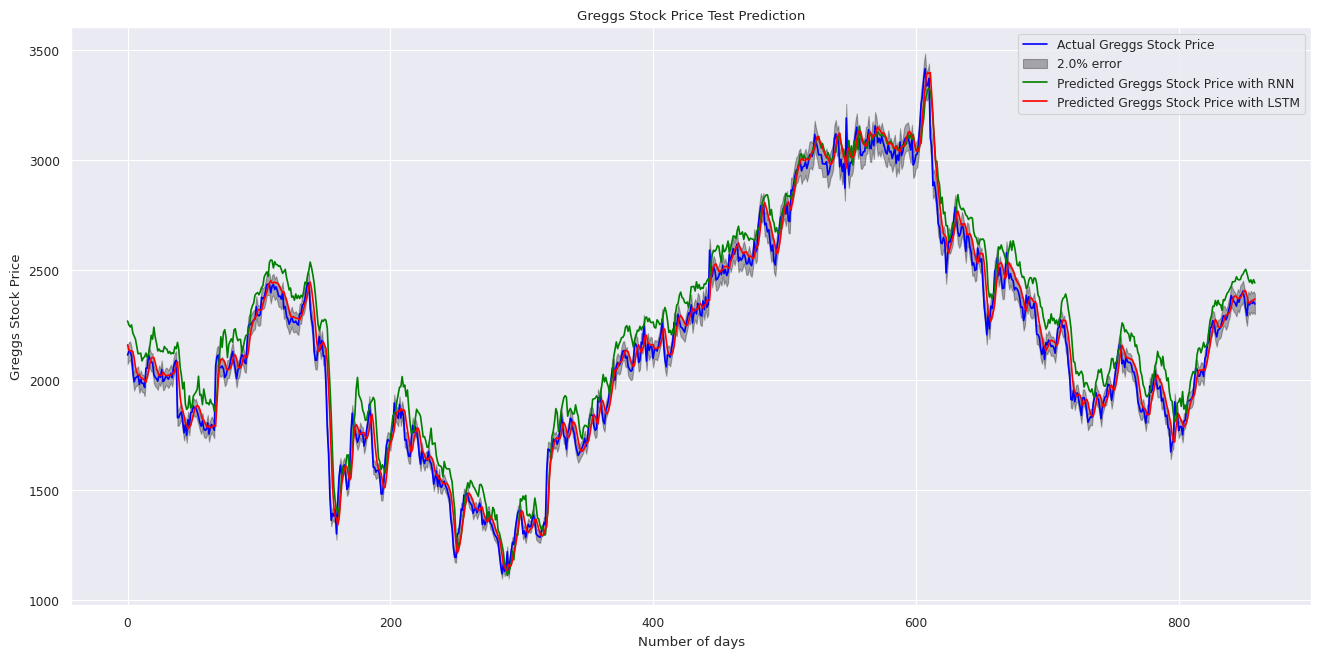

In [ ]:
# Plot the test predictions
plt.figure(figsize=(16,7.5))

plt.plot(actual_prices, color='blue', label='Actual Greggs Stock Price')
error_range = 2/100
plt.fill_between(x=range(actual_prices.shape[0]),
                 y1=(actual_prices - actual_prices*error_range).reshape(-1),
                 y2=(actual_prices + actual_prices*error_range).reshape(-1),
                 color='black', alpha=0.3, label=f'{error_range*100}% error')
plt.plot(rnn_predictions, color='green',
         label='Predicted Greggs Stock Price with RNN')
plt.plot(lstm_predictions, color='red',
         label='Predicted Greggs Stock Price with LSTM')

plt.title('Greggs Stock Price Test Prediction')
plt.xlabel('Number of days')
plt.ylabel('Greggs Stock Price')
plt.legend()

plt.savefig('test_prediction.png', dpi=300, bbox_inches="tight")
plt.show()

# Future Predictions

In [ ]:
# Define a function to predict future days
def predict_future_days(model, base_data, days_to_predict, scaler, look_back):
    ''' Function to predict fututre days.
    Returns a list of predicted values.
    Arguments:
      A model to predict.
      The scaled data used.
      Number of days to be predicted.
      The class used for scaling.
      Look back used for data generation.
    '''
    # Start with the last days of the base data
    input_data = base_data[-look_back:].reshape(1, look_back, 1)

    # Predict future days
    future_predictions = []

    for _ in range(days_to_predict):
        # Make a prediction
        prediction = model.predict(input_data)

        # Append the prediction
        future_predictions.append(prediction[0, 0])

        # Update the input data to include the prediction and exclude the
        # oldest data point
        # Correctly reshape the prediction to (1, 1, 1) before appending
        input_data = np.append(input_data[:, 1:, :],
                               prediction.reshape(1, 1, 1), axis=1)

    # Invert the scaling
    future_predictions = \
    scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    return future_predictions

In [ ]:
# Predict next few days
days_to_predict = 35
future_days = predict_future_days(lstm_model, scaled_data, days_to_predict,
                                  scaler, look_back)

1/1 [==============================] - 0s 19ms/step


In [ ]:
# Print the predictions
print(f'Predictions for next {days_to_predict} days:\n',
      future_days.reshape(-1))

Predictions for next 35 days:
 [2367.7388 2374.0642 2382.0227 2390.5496 2399.354  2408.3381 2417.4573
 2426.6863 2436.0093 2445.4175 2454.9053 2464.4692 2474.1086 2483.823
 2493.612  2503.4763 2513.4158 2523.4316 2533.524  2543.6929 2553.9392
 2564.264  2574.6665 2585.1477 2595.708  2606.3477 2617.0671 2627.8667
 2638.7466 2649.7073 2660.749  2671.872  2683.0771 2694.364  2705.7334]


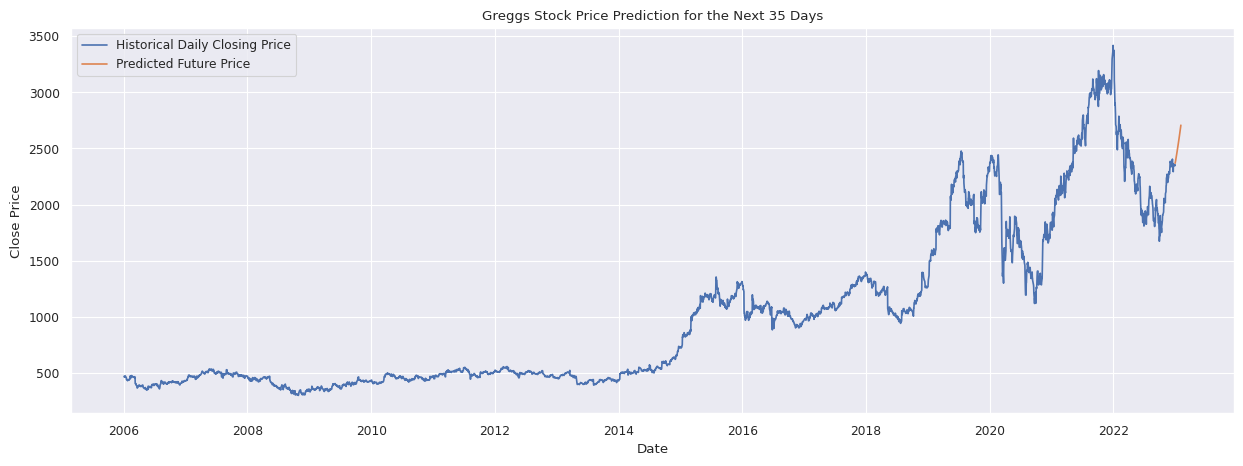

In [ ]:
# Plot the predictions
plt.figure(figsize=(15,5))

plt.plot(data.index, data['Close'], label='Historical Daily Closing Price')
predicted_dates = pd.date_range(start=data.index[-1],
                                periods=days_to_predict + 1, inclusive='right')
plt.plot(predicted_dates, future_days, label='Predicted Future Price')

plt.title(f'Greggs Stock Price Prediction for the Next {days_to_predict} Days')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.savefig(f'prediction_for_next_{days_to_predict}_days.png', dpi=300,
            bbox_inches="tight")
plt.show()

# Evaluation

In [ ]:
# Analyse the predictions

# Fetch latest stock data from Yahoo Finance
ticker = 'GRG.L'
new_data = yf.download(ticker, start="2023-01-01", end='2023-11-30')
# Extract the 'Close' prices
new_close = new_data['Close']
# Create new dataframe
pred_df = new_close.iloc[:days_to_predict]
pred_df = pred_df.to_frame()
pred_df['Predictions'] = future_days.reshape(-1)
pred_df.head()

[*********************100%%**********************]  1 of 1 completed


,Close,Predictions
Date,,
2023-01-03,2388.0,2367.738770
2023-01-04,2442.0,2374.064209
2023-01-05,2418.0,2382.022705
2023-01-06,2386.0,2390.549561
2023-01-09,2444.0,2399.354004


In [ ]:
# Find percentage error
pred_df['Percentage Error'] =\
 (np.abs((pred_df['Close'] - pred_df['Predictions']) / pred_df['Close'])) * 100
pred_df.head()

,Close,Predictions,Percentage Error
Date,,,
2023-01-03,2388.0,2367.738770,0.848460
2023-01-04,2442.0,2374.064209,2.781973
2023-01-05,2418.0,2382.022705,1.487895
2023-01-06,2386.0,2390.549561,0.190677
2023-01-09,2444.0,2399.354004,1.826759


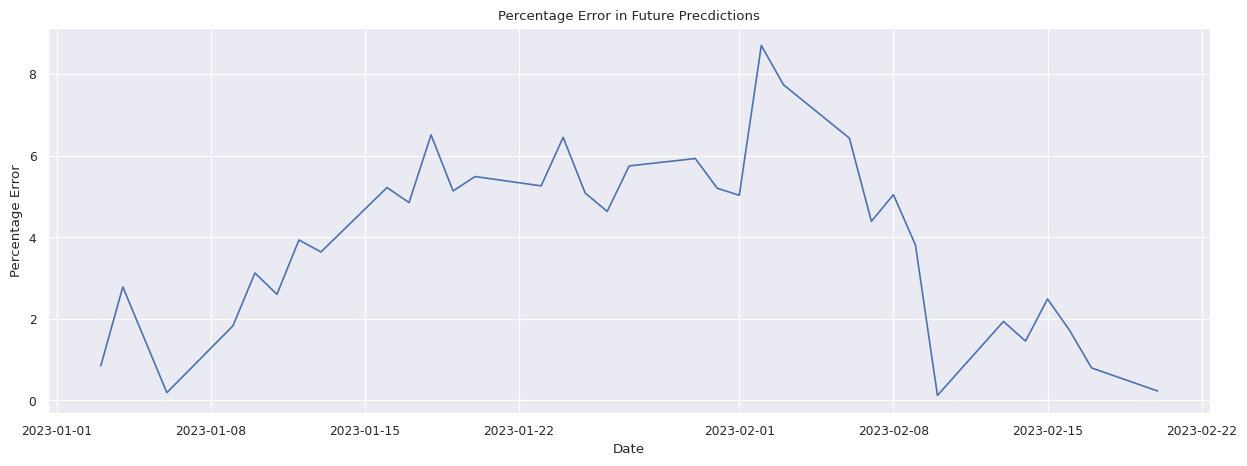

In [ ]:
# Plot the errors
plt.figure(figsize=(15,5))
plt.plot(pred_df.index, pred_df['Percentage Error'])
plt.title('Percentage Error in Future Precdictions')
plt.xlabel('Date')
plt.ylabel('Percentage Error')
plt.show()

In [ ]:
# Find minimum and maximum percentage error
print('Minimum Percentage error:',
      np.round(pred_df['Percentage Error'].min(), 4),
      '\nMaximum Percentage error:',
      np.round(pred_df['Percentage Error'].max(), 4))

Minimum Percentage error: 0.1231 
Maximum Percentage error: 8.6998
